# t-SNE Tutorial

In [1]:
import numpy as np

import scipy

import sklearn

import matplotlib.pyplot as plt

from functions import plot_faces, plot_digits, pointCluster, plot2D, draw_faces, pointClusterMulti, pointTriCluster

from sklearn import manifold, datasets
from sklearn.manifold import TSNE

### Prosty przyklad zklastrowanych punktow

Prosty przyklad pokazujacy dzialanie t-SNE na dwoch klastrach punktow oddalonych od siebie w 2D

Zaladowanie zbioru danych

In [2]:
data, colors = pointCluster(200)

Wyswietlenie zbioru wygenerowanych punktow

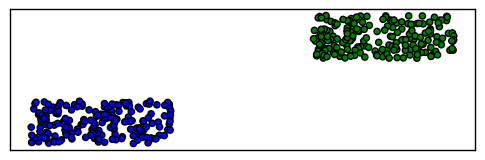

In [3]:
plot2D(data, colors)

#### Zadanie 1

Przeprowadz redukcje t-SNE zbioru punktow

Dokumentacja [t-SNE](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)

In [4]:
tsne = manifold.TSNE(n_components = 2, init ='pca', learning_rate = 1000)
data_tsne = tsne.fit_transform(data)

Wyswietl wykres korzystajac z funkcji plot2D

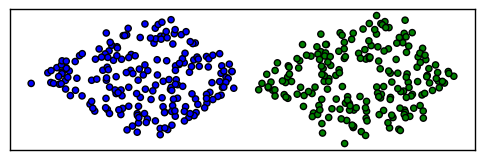

In [5]:
plot2D(data_tsne, colors)

Zmieniajac parametry perplexity, init oraz learning_rate zaobserwuj roznice w wygenerowanym wykresie

### Prosty przyklad zklastrowanych punktow 2

Prosty przyklad przedstawiajacy powiekszenie mniejszego klastra punktow w wyniku przeprowadzenia redukcji t-SNE

Zaladowanie zbioru danych

In [6]:
data2, colors2 = pointClusterMulti(100)

/home/wg/Documents/tsne_tutorial/tsne-tutorial/venv/lib/python3.4/site-packages/numpy/core/numeric.py:297: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)


#### Zadanie 2

Przeprowadz redukcje wymiarow przy pomocy t-SNE

In [7]:
tsne = manifold.TSNE(n_components = 2, 
                     init='pca', random_state = 0, learning_rate = 100)
data_tsne = tsne.fit_transform(data2)

Wyswietl reprezentacje graficzna zredukowanego zbiory przy pomocy funkcji plot2D

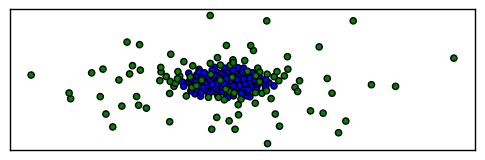

In [8]:
plot2D(data_tsne, colors2)

Zmieniajac parametry sprobuj doprowadzic do sytuacji w ktorej niebieskie punkty znajduja sie blizej siebie w centrum. 

Wykorzystaj zmiane parametru learning_rate.

### Zbior recznie napisanych cyfr

Zaladowanie zbioru danych

In [9]:
digits = datasets.load_digits(n_class=6)
X = digits.data

#### Zadanie 3

Przeprowadz redukcje przy pomocy t-SNE

In [10]:
tsne = manifold.TSNE(n_components=2, perplexity= 50)
X_tsne = tsne.fit_transform(X)

Wyswietl wizualizacje zredukowanego zbioru przy pomocy funkcji plot_digits(zbior zredukowany, pierwotny zbior cyfr)

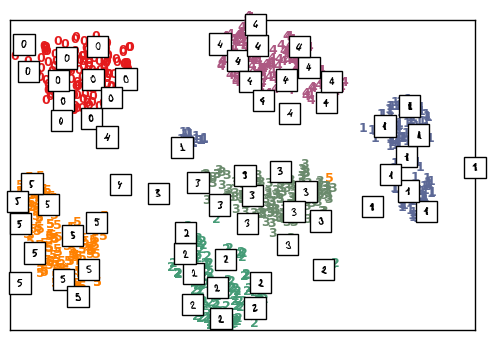

In [11]:
plot_digits(X_tsne, digits)



### Zbior zdjec twarz

Zaladowanie zbioru danych

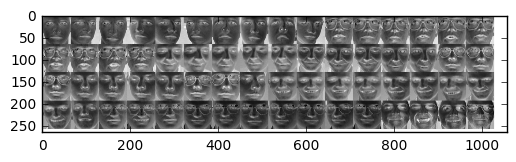

In [12]:
faces = datasets.fetch_olivetti_faces()
draw_faces(faces)

#### Zadanie4

Przeprowadz redukcje zbioru zdjec przy pomocy t-SNE

In [13]:
tsne = manifold.TSNE(n_components=2, early_exaggeration = 16.0, perplexity= 50, init='pca', n_iter=5000)
face_tsne = tsne.fit_transform(faces.data)

Wyswietl wizualizacje zredukowanego zbioru przy pomocy funkcji plot_faces(zbior zredukowany, pierwotny zbior twarzy)

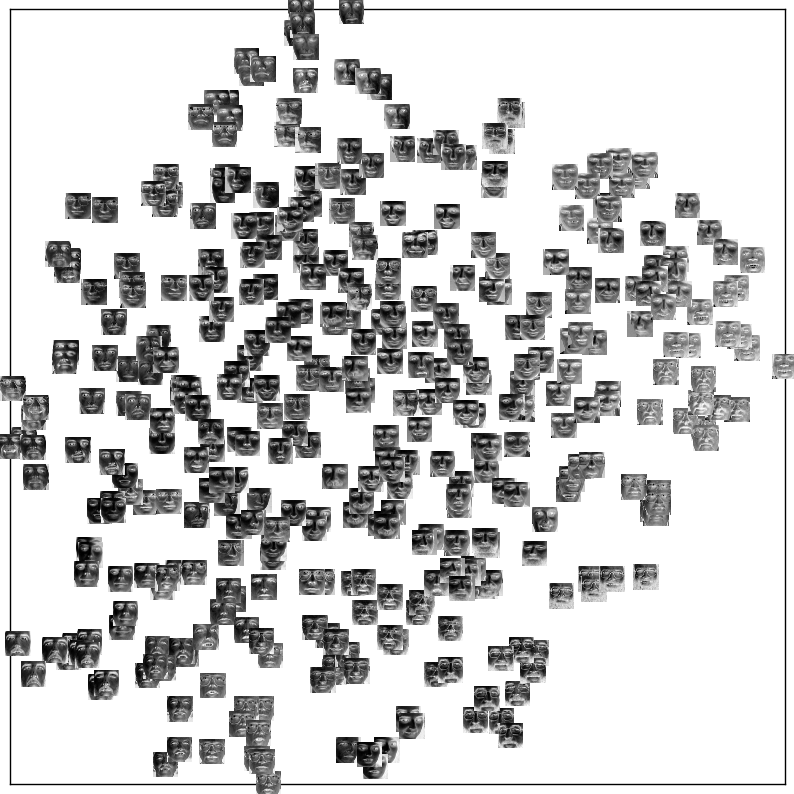

In [14]:
plot_faces(face_tsne, faces)

ValueError: Found array with dim 3. Estimator expected <= 2.